In [ ]:
import pandas as pd
df=pd.read_csv('medical.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.size


9366

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
pip install plotly matplotlib seaborn


In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline


In [ ]:

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']= 14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor'] ='#00000000'

In [ ]:
df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig = px.histogram(df, x='age',marginal='box',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.5)
fig.show()

In [ ]:
fig = px.histogram(df, x='bmi',marginal='box',color_discrete_sequence=['red'],title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df, x='charges',marginal='box',color='smoker',color_discrete_sequence=['green','grey'],title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
px.histogram(df,x='smoker',color='sex',title='smokers')


In [ ]:
fig = px.histogram(df, x='sex',marginal='box',color_discrete_sequence=['red'],title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.scatter(df, x='age',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='AGE VS CHARGES')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig=px.scatter(df,x='bmi',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title="BMI VS CHARGES")
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
px.violin(df,x='children',y='charges')

In [ ]:
# co re relation cofficient measurement
df.charges.corr(df.age)

0.2990081933306476

In [ ]:
# corelation coff between charges and bmi
df.charges.corr(df.bmi)

0.19834096883362895

In [ ]:
df.charges.corr(df.children)

0.06799822684790478

In [ ]:
smoker_values={'no': 0 , 'yes': 1}
smoker_numeric=df.smoker.map(smoker_values)
df.smoker # catagoric data of smokers

smoker_numeric # numeric values of smokers

# cretes a dic then map no to 0 an yes to 1 then use that data

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [ ]:
df.charges.corr(smoker_numeric) # co-corretion of nmeric data of smolers with the cost

0.787251430498478

In [ ]:
# to get the co reation of all the values
px.scatter(df , x='age',y='age')

In [ ]:
new_df=df.drop(columns=['sex','region','smoker'])


In [ ]:
new_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


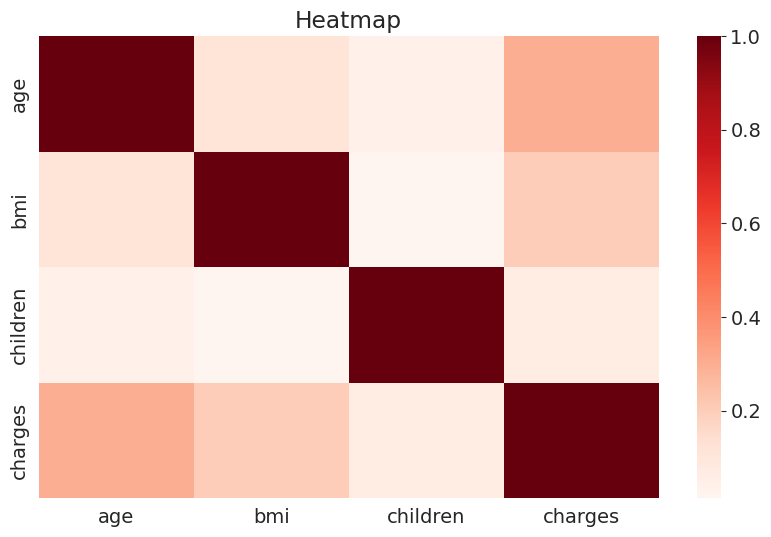

In [ ]:
sns.heatmap(new_df.corr(),cmap='Reds');
plt.title('Heatmap');

In [ ]:
non_sm_df=df[df.smoker=='no']
non_sm_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


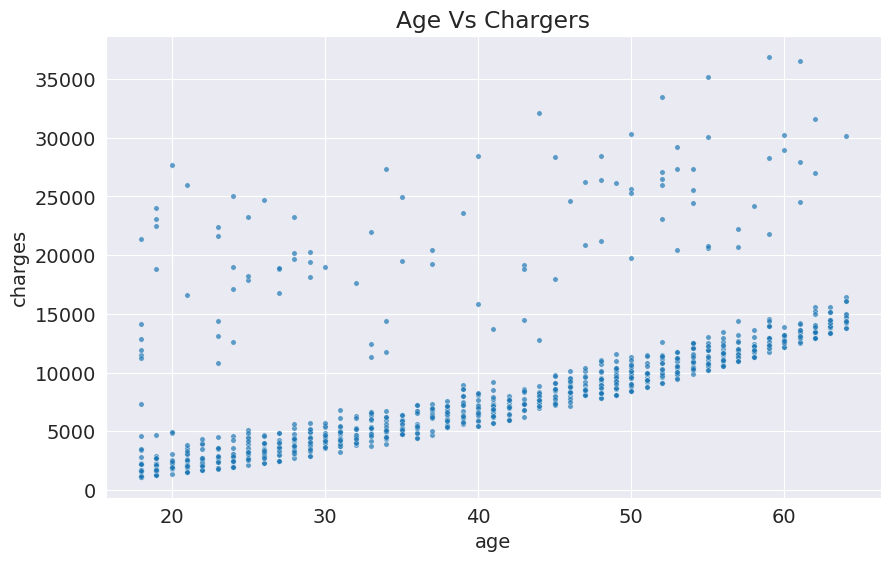

In [ ]:
plt.title('Age Vs Chargers')
sns.scatterplot(data=non_sm_df,x='age',y='charges',alpha=0.7,s=15);

In [ ]:
def esti(age,w,b):
  return w*age+b

w=50
b=100


esti(40,w,b)

2100

In [ ]:
ages=non_sm_df.age
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [ ]:
non_sm_df.charges# actual charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
esti_charges=esti(ages,w,b)
esti_charges#esrimated charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


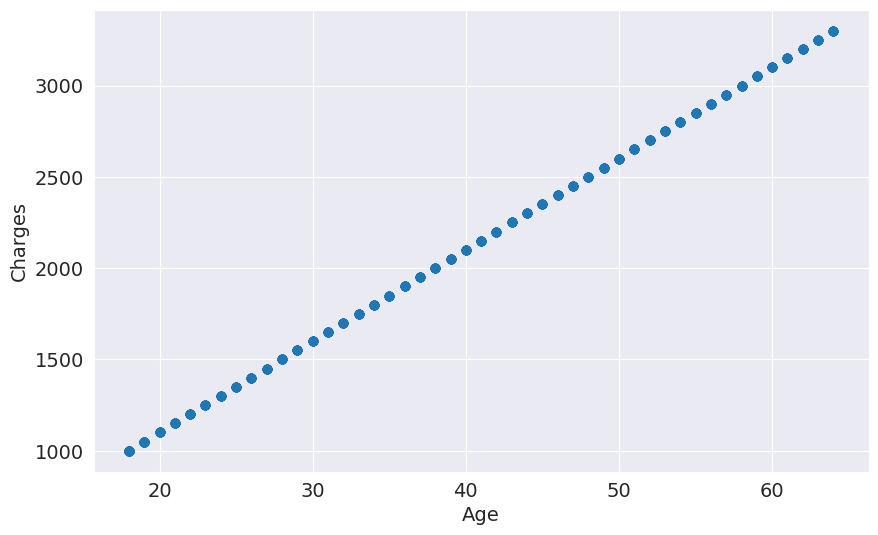

In [ ]:
plt.scatter(ages,esti_charges);
plt.xlabel('Age');
plt.ylabel('Charges');


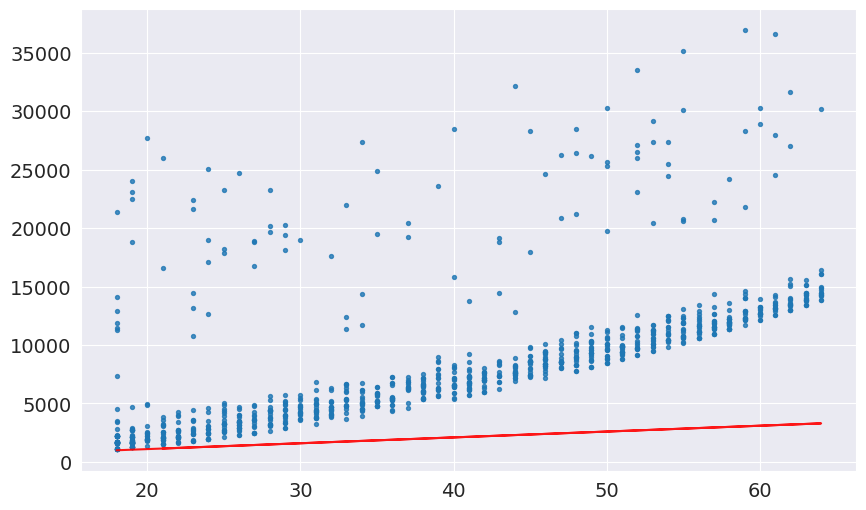

In [ ]:
target = non_sm_df.charges
plt.plot(ages,esti_charges,'r',alpha=0.9);
plt.scatter(ages,target,s=8,alpha=0.8);


In [ ]:
def try_pera(w,b):
  ages=non_sm_df.age
  target=non_sm_df.charges

  est_charges=esti(ages,w,b)

  plt.plot(ages,est_charges,'r',alpha=0.9);
  plt.scatter(ages,target,s=8,alpha=0.8);
  plt.xlabel('ages');
  plt.ylabel('charges')
  plt.legend(['Estimate','actual']);



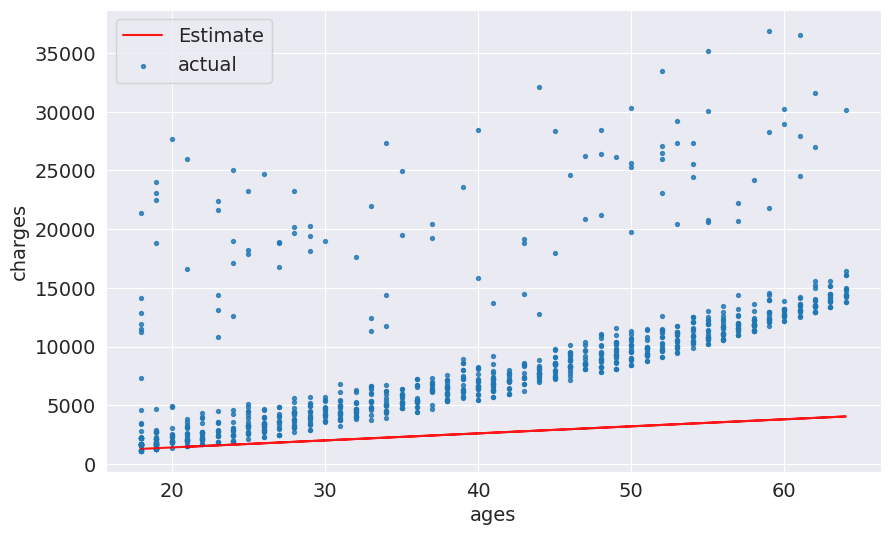

In [ ]:
try_pera(60,200)

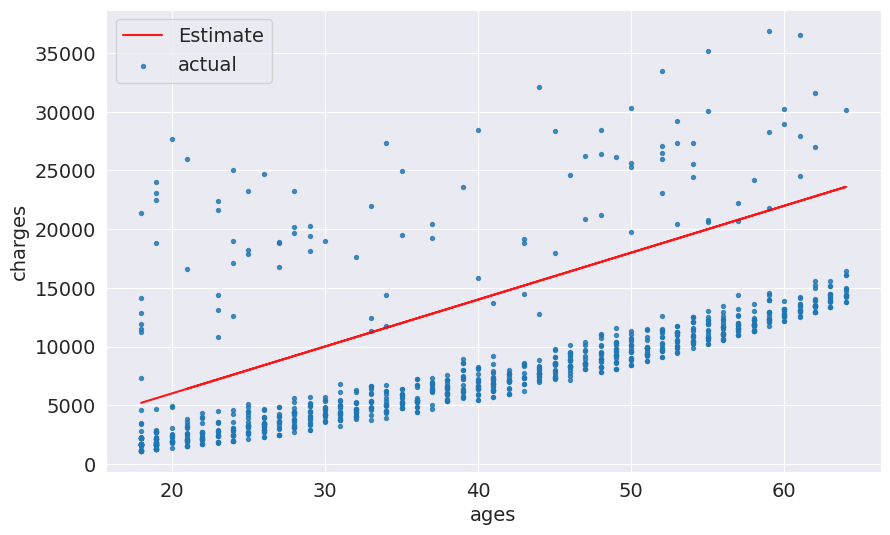

In [ ]:
try_pera(400,-2000)


In [ ]:
target=non_sm_df.charges
target# target to fit the line which was not fitting

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
predictions= esti_charges
predictions # actual charges which are there
# now will subtract the pridiction from the actual charges to get the difference between them


,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [ ]:
# implememt RMSE formula here to know how far we wre from the actual value
# there are negative values so Sutraction is not easy to do so first root and the  square is taken



In [ ]:
pip install numpy --quiet


In [ ]:
import numpy as np


In [ ]:
def rmse(targets,predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [ ]:
w=50
b=100

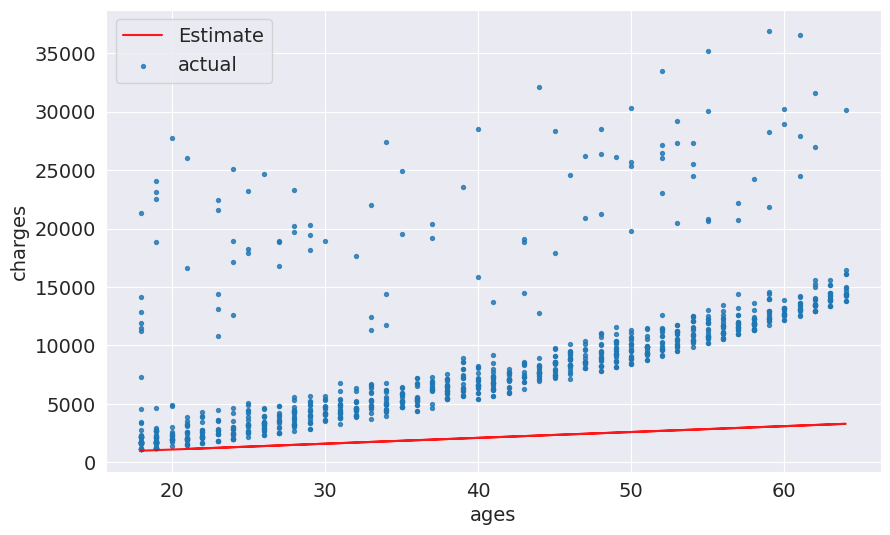

In [ ]:
try_pera(w,b)

In [ ]:
#now use rmse function

In [ ]:
targets=non_sm_df.charges
predictions=esti_charges

In [ ]:
def rmse(targets,predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))
rmse(targets,predictions)

8461.949562575493

on average each element is far away with 8461 distance

In [ ]:
def try_pera(w,b):
  ages=non_sm_df.age
  target=non_sm_df.charges
  predictions=esti(ages,w,b)


  plt.plot(ages,predictions,'r',alpha=0.9);
  plt.scatter(ages,target,s=8,alpha=0.8);
  plt.xlabel('ages');
  plt.ylabel('charges')
  plt.legend(['Predictions','actual']);
  loss=rmse(target,predictions)
  print("RMSE LOSS",loss)


RMSE LOSS 4808.139117283528


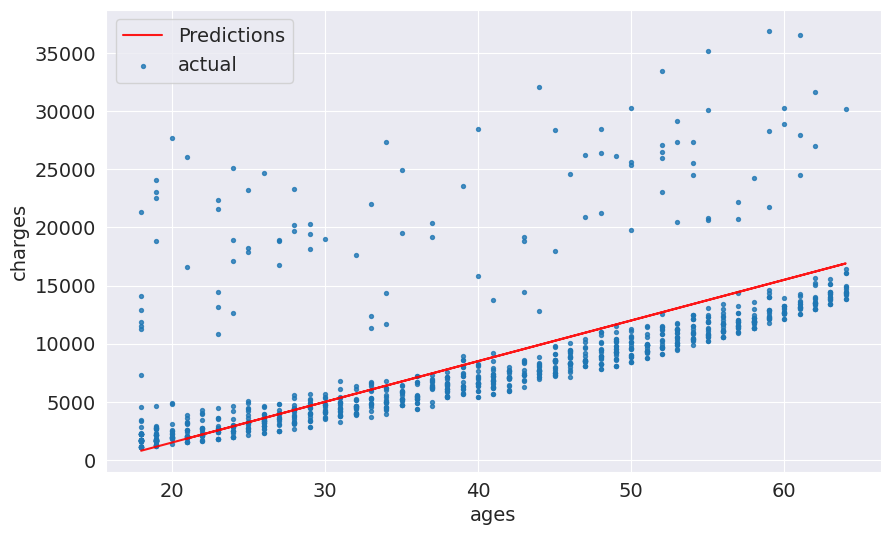

In [ ]:
try_pera(350,-5500) #brute force

In [ ]:
# now use sckit learn to implement these things
# use Linear Regression class to implement or to solve this problem


In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model= LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
# we need 2d array to use sckitlearn function for inputs linear regression

In [ ]:
inputs=non_sm_df[['age']]
targets=non_sm_df.charges
print("inputs.shape: ",inputs.shape)
print("targets.shape: ",targets.shape)


inputs.shape:  (1064, 1)
targets.shape:  (1064,)


In [ ]:
model.fit(inputs,targets)

LinearRegression()

In [ ]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions=model.predict(inputs)
#the values of calcutions for all the inputs(ages) we gave to the model
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
inputs # these were the inputs given

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [ ]:
# rmse for this model is
rmse(targets,predictions)

4662.505766636395

stopped at 12746

In [ ]:
model.coef_#BIAS

array([267.24891283])

In [ ]:
model.intercept_#Weighta

-2091.4205565650864

RMSE LOSS 4662.505766636395


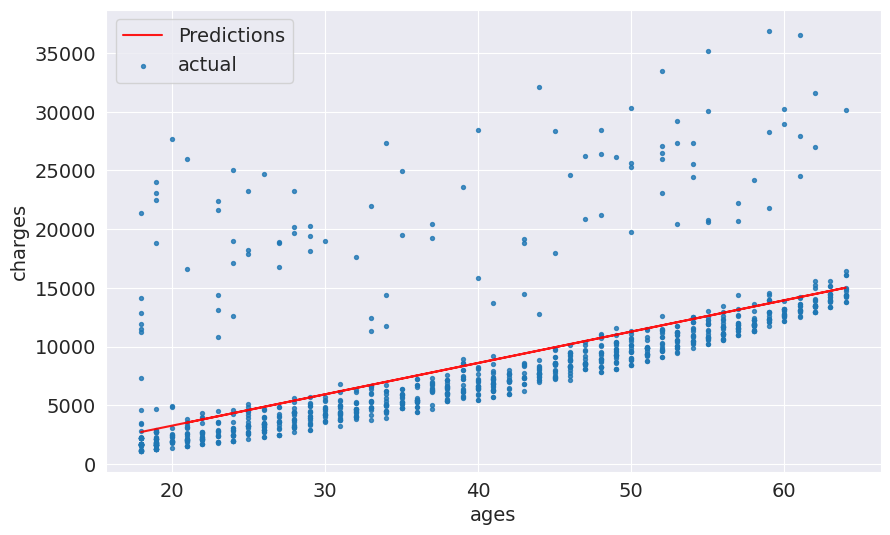

In [ ]:
try_pera(model.coef_,model.intercept_)

In [ ]:
# for the other parameters likes we baias as well
# we need to another model





# charges=w1 x age + w2 X bmi + b
inputs, targets = non_sm_df[['age','bmi']],non_sm_df['charges']
# TRAIN THE MODEL
model=LinearRegression().fit(inputs,targets)
# GENERATE THE PREDIFTIONS
predictions=model.predict(inputs)

# compute the loss function as well
loss = rmse(targets,predictions)
print("Loss " , loss)

Loss  4662.3128354612945


In [ ]:
non_sm_df.charges.corr(non_sm_df.bmi)

0.0840365431283327

In [ ]:
fig=px.scatter(non_sm_df,x='bmi',y='charges',title='BMI VS CHARGES')
fig.update_traces(marker_size=5)
fig.show()

There is no improvement in the loss function because the co relation cofficent is very low between charges and bmi

In [ ]:
model.coef_,model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

there is very less contribution of BMI to the overall hence we need to remove this


In [ ]:
# for the other parameters likes we baias as well
# we need to another model





# charges=w1 x age + w2 X bmi + b
inputs, targets = non_sm_df[['age','bmi','children']],non_sm_df['charges']
# TRAIN THE MODEL
model=LinearRegression().fit(inputs,targets)
# GENERATE THE PREDIFTIONS
predictions=model.predict(inputs)

# compute the loss function as well
loss = rmse(targets,predictions)
print("Loss " , loss)

Loss  4608.470405038247


In [ ]:
# for the other parameters likes we baias as well
# we need to another model

##########Entire data base


# charges=w1 x age + w2 X bmi + b
inputs, targets = df[['age','bmi','children']],df['charges']
# TRAIN THE MODEL
model=LinearRegression().fit(inputs,targets)
# GENERATE THE PREDIFTIONS
predictions=model.predict(inputs)

# compute the loss function as well
loss = rmse(targets,predictions)
print("Loss " , loss)

Loss  11355.317901125973


In [ ]:
px.scatter(df,x='age',y='charges', color="smoker")
# here we were only predicting the data for non smoker but now we insert all the dataset

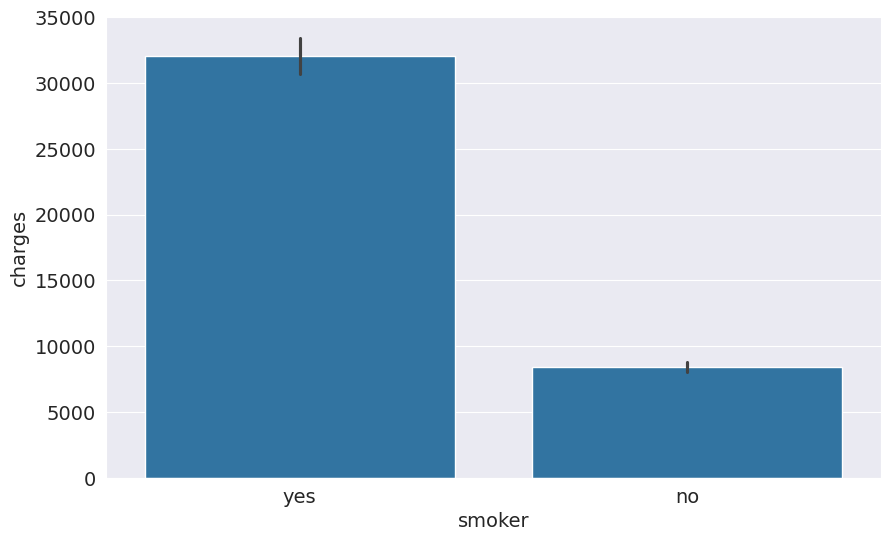

In [ ]:
# now according to the tutorial we need to convert catagorical data to numerical data


# Binary Catagories
sns.barplot(data=df,x='smoker',y='charges');


In [ ]:
smoker_codes={'no': 0 , 'yes': 1}
smoker_numeric=df.smoker.map(smoker_codes)
smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [ ]:
df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
smoker_codes={'no': 0 , 'yes': 1}
df['smoker_code']=df.smoker.map(smoker_codes)
df
# adding smoker column to the dataset....................



,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [ ]:
# for the other parameters likes we baias as well
# we need to another model

##########Entire data base


# charges=w1 x age + w2 X bmi + b
inputs, targets = df[['age','bmi','children','smoker_code']],df['charges']
# TRAIN THE MODEL
model=LinearRegression().fit(inputs,targets)
# GENERATE THE PREDIFTIONS
predictions=model.predict(inputs)

# compute the loss function as well
loss = rmse(targets,predictions)
print("Loss " , loss)

Loss  6056.439217188081


loss is decreased so we should not ignore catagorical data for predictions,,,,

In [ ]:
# now convert the catagorical data to numerical data.............

In [ ]:
sex_codeds={'male': 0 , 'female': 1}
df['sex_code']=df.sex.map(sex_codeds)
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1
1335,18,female,36.850,0,no,southeast,1629.83350,0,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1


In [ ]:
non_sm_df.charges.corr(non_sm_df.children)

0.13892870453542192

In [ ]:
fig=px.strip(non_sm_df,x='children',y='charges',title='Children VS Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
inputs , targets = non_sm_df[['age','bmi','children']],non_sm_df.charges

model=LinearRegression().fit(inputs , targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print("Loss: ",loss)

Loss:  4608.470405038247


In [ ]:
non_sm_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [ ]:
inputs , targets = df[['age','bmi','children']],df.charges

model=LinearRegression().fit(inputs , targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print("Loss: ",loss)

Loss:  11355.317901125973


In [ ]:
px.scatter(df,x='age',y='charges',color='smoker')


<Axes: xlabel='smoker', ylabel='charges'>

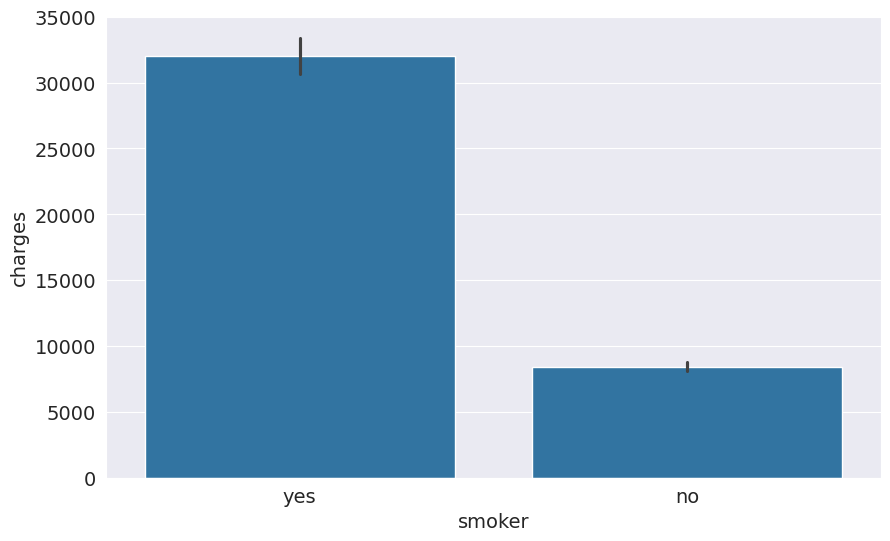

In [ ]:
sns.barplot(data=df,x='smoker',y='charges')


In [ ]:
df.charges.corr(df.smoker_code)

0.787251430498478

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1
1335,18,female,36.850,0,no,southeast,1629.83350,0,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1


now I have converted use orginal dataset...........


In [ ]:
inputs,targets=df[['age','bmi','children','smoker_code']], df.charges
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print("Loss: ",loss)

# there can be seen that teh loss has been reduced to a certain value

Loss:  6056.439217188081


In [ ]:
inputs,targets=df[['age','bmi','children','smoker_code','sex_code']], df.charges
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print("Loss: ",loss)

# there can be seen that teh loass has been reduced to a certain value

Loss:  6056.100708754546


In [ ]:
df.charges.corr(df.sex_code)


-0.057292062202025484

<Axes: xlabel='sex', ylabel='charges'>

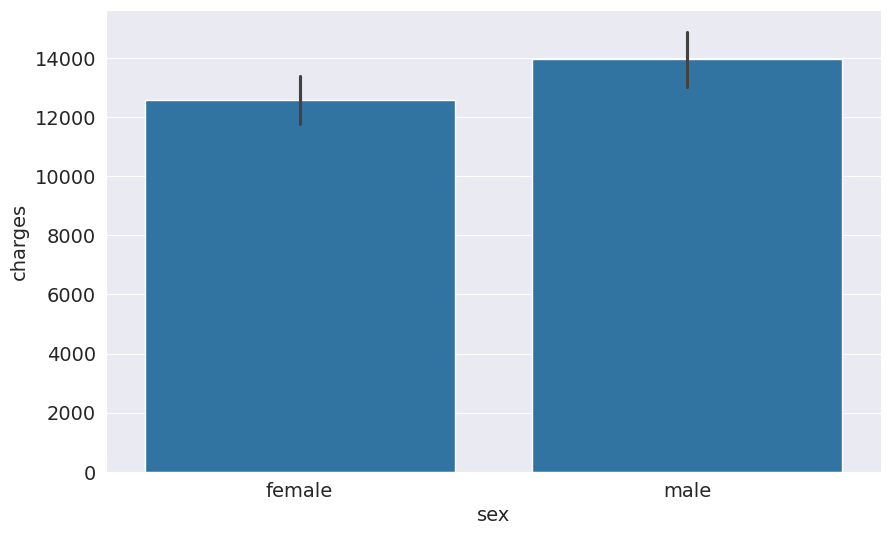

In [ ]:
sns.barplot(data=df,x='sex',y='charges')

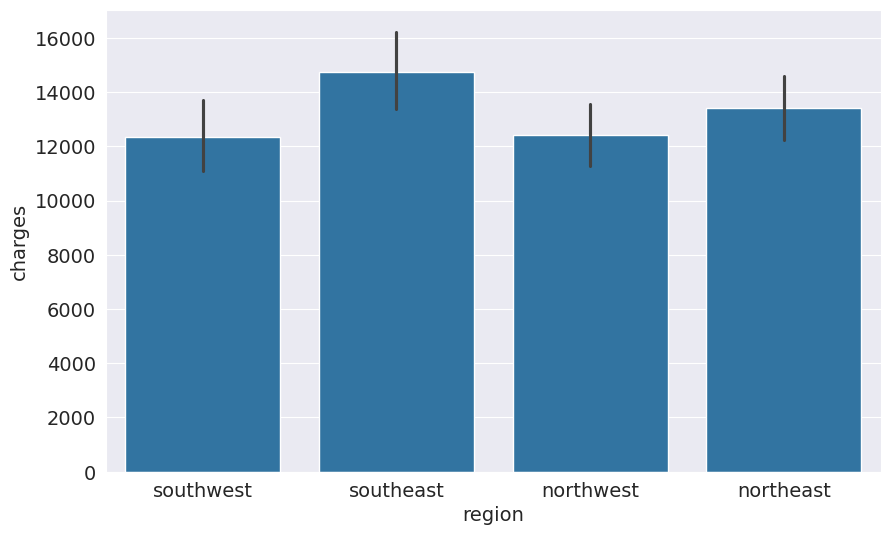

In [ ]:
sns.barplot(data=df,x='region',y='charges');

In [ ]:
#because region is factor we might include this to pridrict the outcomes properly
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
enc.transform([['northeast'],['northwest']]).toarray()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
one_hot=enc.transform(df[['region']]).toarray()
one_hot
# in this we have converted the catagorical data into numerical data by using one hot encoder
#hot encoder converts the catagories into the binary form by making an array then differnt catagories

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
df[['northeast','northwest','southeast','southwest']]=one_hot

In [ ]:
df# the data is converted into numrical data

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0.0,0.0,0.0,1.0


In [ ]:
# now we can include region into our model as well
input_cols=['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']
inputs,targets=df[input_cols],df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
Loss=rmse(targets,predictions)
print('LOSS' , loss)



LOSS 6056.100708754546


In [ ]:

df[input_cols].loc[10]

,10
age,25.00
bmi,26.22
children,0.00
smoker_code,0.00
sex_code,0.00
northeast,1.00
northwest,0.00
southeast,0.00
southwest,0.00


In [ ]:
model.predict([[28,30,2,1,0,0,1,0,0]]) #we predict this with the help of linear regresson we pass the attributes....

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29744.5002766])

In [ ]:
# Feature Scaling:
model.coef_
# weights

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
model.intercept_ # BAIS applied to the model

-12656.862170590564

In [ ]:
weights_df=pd.DataFrame({
    'feature': np.append(input_cols,1),
    'weight': np.append(model.coef_,model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12656.862171


In [ ]:
# as we can see from the above example that some featuers have high range like 121322 or any thing
# in order to make model more accture we need to convert all the input values around to zero because the this leads to error
# for this we use standerization as shown below:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


In [ ]:
numerical_cols=['age','bmi','children']
scaler=StandardScaler()
scaler.fit(df[numerical_cols])

StandardScaler()

In [ ]:
df[numerical_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
#now transform the data:
Scaled_inouts=scaler.transform(df[numerical_cols])
Scaled_inouts

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols=['smoker_code','sex_code','northeast','northwest','southeast','southwest']
catagorical_data=df[cat_cols].values
catagorical_data

array([[1., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [1., 1., 0., 1., 0., 0.]])

In [ ]:

inputs=np.concatenate((Scaled_inouts,catagorical_data),axis=1)
inputs

array([[-1.4387642602644821, -0.45332000146019785, -0.9086136674186784,
        ..., 0.0, 0.0, 1.0],
       [-1.5099654504939408, 0.5096210969173165, -0.07876719164653397,
        ..., 0.0, 1.0, 0.0],
       [-0.7979535481993532, 0.38330684721532526, 1.580925759897755, ...,
        0.0, 1.0, 0.0],
       ...,
       [-1.5099654504939408, 1.014878095725279, -0.9086136674186784, ...,
        0.0, 1.0, 0.0],
       [-1.2963618798055645, -0.797813409738354, -0.9086136674186784,
        ..., 0.0, 0.0, 1.0],
       [1.5516857293727864, -0.2613879597052247, -0.9086136674186784,
        ..., 1.0, 0.0, 0.0]], dtype=object)

In [ ]:
inputs[0]# this is the combination of both catagorical data as well as scaled data

array([-1.4387642602644821, -0.45332000146019785, -0.9086136674186784,
       'yes', 1, 0.0, 0.0, 0.0, 1.0], dtype=object)

In [ ]:
inputs=np.concatenate((Scaled_inouts,catagorical_data),axis=1)
targets=df.charges
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print("Loss: ",loss)


Loss:  6041.6796511744515


In [ ]:
weights_df=pd.DataFrame({
    'feature': np.append(numerical_cols+cat_cols,1),
    'weight': np.append(model.coef_,model.intercept_)
})
weights_df.sort_values('weight',ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8335.168856
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [ ]:

scaler.transform([[28,30,2]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [ ]:
model.predict([[-0.79795355, -0.10882659,  0.75107928,1,0,0,1,0,0]])

array([29744.50027431])